In [1]:
# imports
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from itertools import permutations, combinations, product
import itertools
DATE = datetime.now().strftime("%Y-%m-%d")

import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib.ticker import FuncFormatter

## NEFL
Located on chr 8, coordinates are: chr8:24,950,955-24,956,612

## The files below were generated using the following bcftools commands:
### First, filter the original phase 3 2019 Thousand Genomes vcf to only include biallelic SNPs
bcftools view -Oz -m 2 -M 2 --types=snps databases/1000_genomes/release/20190312_biallelic_SNV_and_INDEL//ALL.chr8.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz > TGP_chr8_biallelicSNPs.vcf.gz

### Can visualize the result with:
bcftools stats TGP_chr8_biallelicSNPs.vcf.gz

### Next, create the index for this file:
bcftools index -t TGP_chr8_biallelicSNPs.vcf.gz

### Next, filter the file to only contain the positions of interest (e.g. NEFL region + 50,000bp upstream and downstream):
bcftools filter -i 'POS>=24900955 & POS<=25006612' -O z -o TGP_chr8_biallelicSNPs_NEFLregion.vcf.gz TGP_chr8_biallelicSNPs.vcf.gz
(unzip with gzip -dk)

### Visualize this file below:

In [2]:
#format the vcf column names for ease of use
sample_list = list(range(1,2549))
string_list = list(map(str, sample_list))
cols=['chr', 'pos', 'rsid', 'ref', 'alt', 'qual', 'filter', 'info', 'format'] + ["sample" + s for s in string_list]

In [3]:
# load the vcf
vcf = pd.read_table('~/ConklinCollab/data/TGP_chr8_biallelicSNPs_NEFLregion.vcf', comment='#', header=None)
vcf.columns = cols
vcf

,chr,pos,rsid,ref,alt,qual,filter,info,format,sample1,...,sample2539,sample2540,sample2541,sample2542,sample2543,sample2544,sample2545,sample2546,sample2547,sample2548
0,8,24900967,.,G,A,.,PASS,AC=1;AN=5096;DP=23019;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,8,24900968,.,T,C,.,PASS,AC=1;AN=5096;DP=23031;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,8,24901153,.,C,G,.,PASS,AC=1;AN=5096;DP=20541;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,8,24901167,.,G,A,.,PASS,AC=1;AN=5096;DP=20662;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,8,24901201,.,G,A,.,PASS,AC=17;AN=5096;DP=20853;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,8,25006513,.,A,G,.,PASS,AC=4;AN=5096;DP=22543;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2826,8,25006522,.,C,T,.,PASS,AC=3;AN=5096;DP=22825;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2827,8,25006532,.,G,A,.,PASS,AC=2;AN=5096;DP=22948;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2828,8,25006548,.,T,A,.,PASS,AC=1;AN=5096;DP=23198;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [20]:
# let's add an additional filtering step such that the region excludes cis regulatory elements and the end of the nearby gene NEFM
vcf = vcf.loc[(vcf['pos']>24919093)] # filter out end of NEFM gene
# vcf = vcf[~vcf['pos'].between(24927464, 24927784)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(2492700, 24933047)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(24933957, 24934120)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(24941653, 24941803)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(24941939, 24942184)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(24942207, 24942410)] # filter out CRE
# vcf = vcf[~vcf['pos'].between(24942417, 24943439)] # filter out CRE
vcf

,chr,pos,rsid,ref,alt,qual,filter,info,format,sample1,...,sample2539,sample2540,sample2541,sample2542,sample2543,sample2544,sample2545,sample2546,sample2547,sample2548
810,8,24933060,.,G,A,.,PASS,AC=4666;AN=5096;DP=22801;AF=0.92;EAS_AF=0.99;E...,GT,1|1,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
811,8,24933085,.,G,T,.,PASS,AC=3;AN=5096;DP=23697;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
812,8,24933138,.,T,C,.,PASS,AC=1;AN=5096;DP=23469;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
813,8,24933139,.,C,T,.,PASS,AC=1;AN=5096;DP=23452;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
814,8,24933153,.,A,G,.,PASS,AC=0;AN=5096;DP=23442;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,8,25006513,.,A,G,.,PASS,AC=4;AN=5096;DP=22543;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2826,8,25006522,.,C,T,.,PASS,AC=3;AN=5096;DP=22825;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2827,8,25006532,.,G,A,.,PASS,AC=2;AN=5096;DP=22948;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2828,8,25006548,.,T,A,.,PASS,AC=1;AN=5096;DP=23198;AF=0;EAS_AF=0;EUR_AF=0;A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


### Finally, extract the relevant allele frequency columns using:
bcftools query -f '%CHROM %POS %REF %ALT %INFO/AC %INFO/AN %INFO/AF %INFO/AFR_AF %INFO/AMR_AF %INFO/EAS_AF %INFO/EUR_AF %SAS_AF\n' TGP_chr8_biallelicSNPs_NEFLregion.vcf -o TGP_chr8_AFs_2019.txt

### Visualize below:

In [21]:
NEFL_chr8 = pd.read_table('~/ConklinCollab/data/TGP_chr8_AFs_2019.txt', sep=' ', names = ['chr', 'pos', 'ref', 'alt', 'ac', 'an', 'af', 'afr_af', 'amr_af', 'eas_af', 'eur_af', 'sas_af'])
NEFL_chr8 = NEFL_chr8.loc[(NEFL_chr8['pos']>24919093)] # filter out end of NEFM gene
NEFL_chr8 = NEFL_chr8[~NEFL_chr8['pos'].between(24927464, 24927784)] # filter out CRE
NEFL_chr8= NEFL_chr8[~NEFL_chr8['pos'].between(2492700, 24933047)] # filter out CRE
NEFL_chr8 = NEFL_chr8[~NEFL_chr8['pos'].between(24933957, 24934120)] # filter out CRE
NEFL_chr8= NEFL_chr8[~NEFL_chr8['pos'].between(24941653, 24941803)] # filter out CRE
NEFL_chr8 = NEFL_chr8[~NEFL_chr8['pos'].between(24941939, 24942184)] # filter out CRE
NEFL_chr8 = NEFL_chr8[~NEFL_chr8['pos'].between(24942207, 24942410)] # filter out CRE
NEFL_chr8 = NEFL_chr8[~NEFL_chr8['pos'].between(24942417, 24943439)] # filter out CRE
NEFL_chr8

,chr,pos,ref,alt,ac,an,af,afr_af,amr_af,eas_af,eur_af,sas_af
810,8,24933060,G,A,4666,5096,0.92,0.89,0.94,0.99,0.88,0.9
811,8,24933085,G,T,3,5096,0.00,0.00,0.00,0.00,0.00,0.0
812,8,24933138,T,C,1,5096,0.00,0.00,0.00,0.00,0.00,0.0
813,8,24933139,C,T,1,5096,0.00,0.00,0.00,0.00,0.00,0.0
814,8,24933153,A,G,0,5096,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2825,8,25006513,A,G,4,5096,0.00,0.00,0.00,0.00,0.00,0.0
2826,8,25006522,C,T,3,5096,0.00,0.00,0.00,0.00,0.00,0.0
2827,8,25006532,G,A,2,5096,0.00,0.00,0.00,0.00,0.00,0.0
2828,8,25006548,T,A,1,5096,0.00,0.00,0.00,0.00,0.00,0.0


In [22]:
# this code applies functions "lambda" that check the length of the reference and alternate columns in the chr8 data frame, and make sure they're not equal to 1
NEFL_chr8_multi = NEFL_chr8[(NEFL_chr8.ref.apply(lambda x: len(str(x))!=1)) & (NEFL_chr8.alt.apply(lambda x: len(str(x))!=1))]
# same thing but checking where ref and alt are equal in length to 1 - this is enforcing that the variation we're looking at is biallelic
# this should be equivalent to the NEFL_chr8 data frame
NEFL_chr8_bi = NEFL_chr8[(NEFL_chr8.ref.apply(lambda x: len(str(x))==1)) & (NEFL_chr8.alt.apply(lambda x: len(str(x))==1))]

# make sure certain columns are the proper integer type
NEFL_chr8['af'] = NEFL_chr8['af'].astype('float')
NEFL_chr8['afr_af'] = NEFL_chr8['afr_af'].astype('float')
NEFL_chr8['amr_af'] = NEFL_chr8['amr_af'].astype('float')
NEFL_chr8['eas_af'] = NEFL_chr8['eas_af'].astype('float')
NEFL_chr8['eur_af'] = NEFL_chr8['eur_af'].astype('float')
NEFL_chr8['sas_af'] = NEFL_chr8['sas_af'].astype('float')

## Filter the variants in the region to be between 10% and 90% allele frequency
This is because we want the variants to be fairly common, but not too common.
Note that 90% isn't too common here because it implies that the corresponding ref or alt allele is at 10% frequency.

In [23]:
region = NEFL_chr8
# get the shape of the dataframe after this filtering
region_filt30 = region[(region.af >= 0.10) & (region.af <= 0.90)]
print(region_filt30.shape)
region_filt30

(128, 12)


,chr,pos,ref,alt,ac,an,af,afr_af,amr_af,eas_af,eur_af,sas_af
834,8,24933753,A,C,1021,5096,0.20,0.16,0.08,0.43,0.13,0.17
835,8,24933877,C,A,4271,5096,0.84,0.61,0.91,0.99,0.88,0.90
852,8,24934415,C,T,4272,5096,0.84,0.61,0.91,0.99,0.88,0.90
857,8,24934607,T,G,4272,5096,0.84,0.61,0.91,0.99,0.88,0.90
864,8,24934756,C,A,4243,5096,0.83,0.59,0.91,0.99,0.88,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2793,8,25005450,C,T,1193,5096,0.23,0.20,0.29,0.21,0.21,0.28
2796,8,25005503,G,C,606,5096,0.12,0.02,0.20,0.21,0.07,0.16
2814,8,25006064,A,G,1045,5096,0.21,0.18,0.25,0.19,0.19,0.25
2815,8,25006085,C,A,1137,5096,0.22,0.22,0.24,0.19,0.21,0.26


In [8]:
# region_filt30 = region
# region_filt30

## Cool, looks like there are some variants to work with!
Let's intersect these with the original vcf and then run the greedy algorithm to identify the most individuals that are hit by these variants

In [24]:
common = region_filt30.merge(vcf,on=['chr','pos']) # intersect 30% filtered df and original vcf

In [25]:
common # view

,chr,pos,ref_x,alt_x,ac,an,af,afr_af,amr_af,eas_af,...,sample2539,sample2540,sample2541,sample2542,sample2543,sample2544,sample2545,sample2546,sample2547,sample2548
0,8,24933753,A,C,1021,5096,0.20,0.16,0.08,0.43,...,0|0,0|1,0|0,1|0,0|0,0|0,0|0,0|0,0|1,0|0
1,8,24933877,C,A,4271,5096,0.84,0.61,0.91,0.99,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
2,8,24934415,C,T,4272,5096,0.84,0.61,0.91,0.99,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
3,8,24934607,T,G,4272,5096,0.84,0.61,0.91,0.99,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
4,8,24934756,C,A,4243,5096,0.83,0.59,0.91,0.99,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,8,25005450,C,T,1193,5096,0.23,0.20,0.29,0.21,...,0|1,1|0,0|1,0|1,0|0,0|0,0|1,0|0,0|0,1|0
124,8,25005503,G,C,606,5096,0.12,0.02,0.20,0.21,...,0|0,1|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,1|0
125,8,25006064,A,G,1045,5096,0.21,0.18,0.25,0.19,...,0|1,1|0,0|1,0|1,0|0,0|0,0|1,0|0,0|0,1|0
126,8,25006085,C,A,1137,5096,0.22,0.22,0.24,0.19,...,0|1,1|0,0|1,1|1,0|0,0|0,0|1,0|0,0|1,1|0


In [26]:
vcf_filt = vcf[(vcf.chr.isin(common.chr))&(vcf.pos.isin(common.pos))] # filter original vcf to this
vcf_filt

,chr,pos,rsid,ref,alt,qual,filter,info,format,sample1,...,sample2539,sample2540,sample2541,sample2542,sample2543,sample2544,sample2545,sample2546,sample2547,sample2548
834,8,24933753,.,A,C,.,PASS,AC=1021;AN=5096;DP=17545;AF=0.2;EAS_AF=0.43;EU...,GT,1|0,...,0|0,0|1,0|0,1|0,0|0,0|0,0|0,0|0,0|1,0|0
835,8,24933877,.,C,A,.,PASS,AC=4271;AN=5096;DP=18988;AF=0.84;EAS_AF=0.99;E...,GT,1|1,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
852,8,24934415,.,C,T,.,PASS,AC=4272;AN=5096;DP=23773;AF=0.84;EAS_AF=0.99;E...,GT,1|1,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
857,8,24934607,.,T,G,.,PASS,AC=4272;AN=5096;DP=22909;AF=0.84;EAS_AF=0.99;E...,GT,1|1,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
864,8,24934756,.,C,A,.,PASS,AC=4243;AN=5096;DP=21284;AF=0.83;EAS_AF=0.99;E...,GT,1|1,...,1|1,0|1,0|1,1|1,1|0,0|1,1|1,1|1,0|1,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,8,25005450,.,C,T,.,PASS,AC=1193;AN=5096;DP=17280;AF=0.23;EAS_AF=0.21;E...,GT,0|0,...,0|1,1|0,0|1,0|1,0|0,0|0,0|1,0|0,0|0,1|0
2796,8,25005503,.,G,C,.,PASS,AC=606;AN=5096;DP=17404;AF=0.12;EAS_AF=0.21;EU...,GT,0|0,...,0|0,1|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,1|0
2814,8,25006064,.,A,G,.,PASS,AC=1045;AN=5096;DP=9231;AF=0.21;EAS_AF=0.19;EU...,GT,0|0,...,0|1,1|0,0|1,0|1,0|0,0|0,0|1,0|0,0|0,1|0
2815,8,25006085,.,C,A,.,PASS,AC=1137;AN=5096;DP=10462;AF=0.22;EAS_AF=0.19;E...,GT,0|0,...,0|1,1|0,0|1,1|1,0|0,0|0,0|1,0|0,0|1,1|0


In [27]:
print(vcf_filt.pos.to_list()) # print list of snp positions

[24933753, 24933877, 24934415, 24934607, 24934756, 24935005, 24935177, 24935250, 24935331, 24935332, 24935376, 24935878, 24936026, 24936117, 24936150, 24936272, 24936529, 24936782, 24936805, 24937041, 24937670, 24937674, 24938178, 24938192, 24938338, 24939759, 24941239, 24943947, 24944025, 24944351, 24944722, 24944767, 24946242, 24949329, 24949459, 24950007, 24950272, 24950414, 24950712, 24950767, 24951554, 24952123, 24952575, 24956691, 24956889, 24957233, 24957261, 24957269, 24958616, 24958641, 24958923, 24959091, 24959350, 24959631, 24959708, 24959927, 24959981, 24960138, 24960189, 24960212, 24960290, 24960318, 24960387, 24960392, 24960948, 24961491, 24961602, 24961929, 24962390, 24962650, 24962850, 24963901, 24964133, 24964269, 24964356, 24964502, 24964673, 24967184, 24967871, 24970047, 24970104, 24973068, 24974243, 24974442, 24974484, 24977602, 24978352, 24980954, 24981019, 24981148, 24982325, 24982556, 24982614, 24982682, 24983984, 24986262, 24987377, 24987557, 24990067, 24991070,

In [28]:
# get start and end coordinates of gene
nefl_start = 24950955
nefl_end = 24956612

In [29]:
## split these variants up into upstream and downstream of the gene tss
upstream = region_filt30[region_filt30.pos<nefl_start]["pos"].values.tolist()
downstream = region_filt30[region_filt30.pos>nefl_end]["pos"].values.tolist() #this used to use nefl_start, but we don't want to include snps in the gene itself
print(len(upstream))
print(len(downstream))

40
85


In [30]:
# get the product of these - this will tell us how many combinations of snp pairs there are
len(list(product(upstream, downstream)))

3400

In [31]:
# load functions for the greedy algorithm
def transpose_and_clean(raw_r_tdf):
    r_df = raw_r_tdf.copy() # make a copy
    r_tdf = r_df.transpose() # transpose the copy
    r_tdf.columns = r_tdf.loc["pos", :].values # make the column names the numbers in the position column
    key_df = r_df.loc[
        :, ['chr', 'pos', 'ref', 'alt']
    ].copy()

    clean_r_tdf = r_tdf.iloc[9:, :].copy() # remove some of the initial unneccessary columns

    return clean_r_tdf, key_df


def make_list_of_hets(r_clean_tdf):
    # for each SNP, make a list of heterozygous individuals
    indviduals = r_clean_tdf.index.tolist()
    bool_df = r_clean_tdf.applymap(lambda x: ((x == "0|1") | (x == "1|0"))).copy()

    snp_het_indviduals_dict = dict() # make a dictionary
    for snp in r_clean_tdf.columns:
        het_individual = bool_df.index[bool_df[snp]].tolist()
        snp_het_indviduals_dict[snp] = het_individual

    return snp_het_indviduals_dict


def assert_uniq_val_per_row(df, col_name):
    assert (
        df[col_name].nunique() == df[col_name].shape[0]
    ), f"not every row has a unique {col_name} value"


def count_hets_within_region_for_snp_pairs(region_pairs, r_snp_het_indviduals_dict):

    het_counts_in_paired_snps_within_region_df = pd.DataFrame()
    shared_individual_dict = dict()
    for snp1, snp2 in region_pairs:
        n_het_snp1 = len(set(r_snp_het_indviduals_dict[snp1])) # get the number of heterozygous individuals snp 1 has
        n_het_snp2 = len(set(r_snp_het_indviduals_dict[snp2])) # get the number of heterozygous individuals snp 2 has
        #find the overlap between these individuals
        shared_individuals = set(r_snp_het_indviduals_dict[snp1]).intersection(
            set(r_snp_het_indviduals_dict[snp2])
        )
        # make a dictionary where you can lookup the shared individuals for a pair of snps (snp1, snp2)
        shared_individual_dict[(snp1, snp2)] = shared_individuals
        n_shared_individuals = len(shared_individuals)
        n_all_individuals = len(
            set(r_snp_het_indviduals_dict[snp1]).union(
                set(r_snp_het_indviduals_dict[snp2])
            )
        )
        # make a data frame containing the information for a pair of snps (how many each hits individually, and the overlaps/unions of individuals)
        temp_df = pd.DataFrame(
            {
                "snp1": [snp1],
                "snp2": [snp2],
                "n_shared_individuals": [n_shared_individuals],
                "n_het_snp1": [n_het_snp1],
                "n_het_snp2": [n_het_snp2],
                "n_union_individuals": [n_all_individuals],
            }
        )
        #concatenating this newly filled data frame onto the existing one with each iteration
        het_counts_in_paired_snps_within_region_df = (
            pd.concat([het_counts_in_paired_snps_within_region_df, temp_df], ignore_index=True)
        )
        #return the dataframe and the dictionary indicating which snps share which individuals
    return het_counts_in_paired_snps_within_region_df, shared_individual_dict


def plot_snp_pairs_heatmap(het_counts_in_paired_snps_within_region_df, region_label):
    region_n_shared_individuals_df = het_counts_in_paired_snps_within_region_df.pivot(
        index="snp1", columns="snp2", values="n_shared_individuals"
    )

    snp_order = np.sort(region_n_shared_individuals_df.columns.values)
    row_snp_order = np.sort(region_n_shared_individuals_df.index.values)

    within_region_het_wide_df = region_n_shared_individuals_df.loc[
        row_snp_order, snp_order
    ]

    fig, ax = plt.subplots()
    mask = np.zeros_like(within_region_het_wide_df.values)
    mask[np.triu_indices_from(mask)] = True
    sns.set(font_scale=1.0, rc={"figure.figsize": (14, 14)})
    sns.heatmap(
        within_region_het_wide_df,
        square=True,
        cmap="YlGnBu",
        annot=True,
        fmt=".0f",
        mask=mask,
        ax=ax,
    )

    ax.text(
        15,
        2,
        "Left Position---> Right Position",
        ha="center",
        va="center",
        rotation=0,
        size=15,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2),
    )

    ax.text(
        21,
        6,
        "Left Position---> Right Position",
        ha="center",
        va="center",
        rotation=360 - 90,
        size=15,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2),
    )
    plt.title(f"Count of Heterogzygous Indvidiuals for pairwise snps in {region_label}")



def plot_snp_pairs_heatmap_percent(het_counts_in_paired_snps_within_region_df, region_label):
    region_n_shared_individuals_df = het_counts_in_paired_snps_within_region_df.pivot(
        index="snp1", columns="snp2", values="prop_shared_individuals"
    )

    snp_order = np.sort(region_n_shared_individuals_df.columns.values)
    row_snp_order = np.sort(region_n_shared_individuals_df.index.values)

    within_region_het_wide_df = region_n_shared_individuals_df.loc[
        row_snp_order, snp_order
    ]

    fig, ax = plt.subplots()
    mask = np.zeros_like(within_region_het_wide_df.values)
    mask[np.triu_indices_from(mask)] = True
    sns.set(font_scale=1.0, rc={"figure.figsize": (14, 14)})
    fmt = lambda x,pos: '{:.0%}'.format(x)
    sns.heatmap(
        within_region_het_wide_df,
        square=True,
        cmap="YlGnBu",
        annot=True,
        fmt=".0%",
        mask=mask,
        ax=ax,
        cbar_kws={'format': FuncFormatter(fmt)}
    )

    ax.text(
        15,
        2,
        "Left Position---> Right Position",
        ha="center",
        va="center",
        rotation=0,
        size=15,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2),
    )

    ax.text(
        21,
        6,
        "Left Position---> Right Position",
        ha="center",
        va="center",
        rotation=360 - 90,
        size=15,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="k", lw=2),
    )
    plt.title(f"Percent of Heterogzygous Indvidiuals for pairwise snps in {region_label}")

In [32]:
def cumulative_coverage_inc_per_snp_pair(
    region_het_counts_snp_pairs_df,
    region_shared_ind_dict,
    region_label,
):
    region_het_counts_snp_pairs_df.sort_values(
        "n_shared_individuals", ascending=False, inplace=True
    )
    region_het_counts_snp_pairs_df.reset_index(drop=True, inplace=True)

    # while
    n_pairs = region_het_counts_snp_pairs_df.shape[0]
    new_snps_df = pd.DataFrame()
    for ind, row in region_het_counts_snp_pairs_df.iterrows():
        index_snp1 = row.snp1
        index_snp2 = row.snp2
        index_hets_captured = region_shared_ind_dict[(index_snp1, index_snp2)]

        print(f"{region_label}: On index snps pair {ind} out of {n_pairs:,}.")
        for sind, srow in region_het_counts_snp_pairs_df.iterrows():
            ssnp1 = srow.snp1
            ssnp2 = srow.snp2
            hets_captured = region_shared_ind_dict[(ssnp1, ssnp2)]
            new_hets_captured = hets_captured - index_hets_captured
            running_n_het = len(index_hets_captured)
            index_hets_captured = new_hets_captured.union(index_hets_captured)
            updated_n_hets = len(index_hets_captured)
            n_df = pd.DataFrame(
                {
                    "index_snp1": [index_snp1],
                    "index_snp2": [index_snp2],
                    "new_snp_1": [ssnp1],
                    "new_snp_2": [ssnp2],
                    "het_count_before_addition": running_n_het,
                    "het_count_after_addition": updated_n_hets,
                }
            )
            new_snps_sf = pd.concat([new_snps_df, n_df], ignore_index=True)
            #new_snps_df = new_snps_df.append(n_df)
    return new_snps_df

In [33]:
# rename for typing convenience and generalizability
r1af_df = region_filt30
r1_df = vcf_filt

In [34]:
# quality checks
assert_uniq_val_per_row(r1_df, "pos") # this function checks that all numbers of the 'pos' column are unique
# this function transposes the vcf data frame and 'cleans' it by removing some initial columns that we don't need anymore
r1_clean_tdf, r1_key_df = transpose_and_clean(r1_df)
# r1_clean_tdf is a dataframe of samples x positions
# r1_key_df is a more general list of chr, pos, ref, and alt (wihtout the samples)

In [35]:
r1_clean_tdf

,24933753,24933877,24934415,24934607,24934756,24935005,24935177,24935250,24935331,24935332,...,25001687,25004300,25004538,25005194,25005316,25005450,25005503,25006064,25006085,25006173
sample1,1|0,1|1,1|1,1|1,1|1,1|1,0|0,1|0,1|1,1|1,...,0|1,0|0,0|0,1|0,1|0,0|0,0|0,0|0,0|0,1|0
sample2,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,1|1,0|0,1|1,1|1,0|0,0|0,0|0,0|0,0|0
sample3,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,1|1,1|0,1|1,1|1,1|0,0|0,1|0,1|0,0|0
sample4,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,1|1,0|0,1|1,1|1,0|0,0|0,0|0,0|0,0|0
sample5,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,0|1,0|0,0|1,0|1,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample2544,0|0,0|1,0|1,0|1,0|1,0|1,0|0,0|0,0|1,0|1,...,1|1,0|0,0|0,1|1,1|1,0|0,0|0,0|0,0|0,0|0
sample2545,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,0|1,0|1,0|1,0|1,0|1,0|1,0|1,0|1,0|0
sample2546,0|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,1|1,1|1,...,1|1,1|1,0|0,1|1,1|1,0|0,0|0,0|0,0|0,0|0
sample2547,0|1,0|1,0|1,0|1,0|1,0|1,0|0,0|1,0|1,0|1,...,1|0,0|0,0|0,1|1,1|1,0|0,0|0,0|0,0|1,0|1


In [36]:
# this outputs a dictionary where the keys are positions, and the values are lists of samples that are heterozygous for those positions
r1_snp_het_indviduals_dict = make_list_of_hets(r1_clean_tdf)

In [37]:
union_hets = set() # create an empty set
for snp, het_lists in r1_snp_het_indviduals_dict.items():
    union_hets = set(het_lists).union(union_hets) # combining the snps and samples into a set
len(union_hets)

2503

In [38]:
region1_snps = r1_df["pos"].values.tolist() # get the position values of the region_filt30 data frame into list form
region1_pairs = product(upstream, downstream) #permutations(region1_snps, 2)

In [39]:
# this function outputs a dataframe containing information on how many heterozygous people each snp hits indiviudally and how many people pairs of snps share
# it also outputs a dictionary that tells you which samples are hit by which specific sample id pairs
(region1_het_counts_snp_pairs_df,region1_shared_ind_dict) = count_hets_within_region_for_snp_pairs(region1_pairs, r1_snp_het_indviduals_dict)

In [40]:
# add a column indicating the proportion of total individuals that the number of shared individuals for each pair of snps represents
region1_het_counts_snp_pairs_df['prop_shared_individuals'] = region1_het_counts_snp_pairs_df['n_shared_individuals']/2548 # 2548 = total number of individuals in our data set

In [41]:
region1_het_counts_snp_pairs_df

,snp1,snp2,n_shared_individuals,n_het_snp1,n_het_snp2,n_union_individuals,prop_shared_individuals
0,24933753,24956691,489,733,1049,1293,0.191915
1,24933753,24956889,534,733,1134,1333,0.209576
2,24933753,24957233,470,733,956,1219,0.184458
3,24933753,24957261,401,733,1060,1392,0.157378
4,24933753,24957269,260,733,985,1458,0.102041
...,...,...,...,...,...,...,...
3395,24950767,25005450,377,1076,911,1610,0.147959
3396,24950767,25005503,192,1076,496,1380,0.075353
3397,24950767,25006064,331,1076,811,1556,0.129906
3398,24950767,25006085,356,1076,859,1579,0.139717


In [42]:
# mutate the data frame to have snps be the rows and columns, and the proportions as the values (like a heat map almost)
region_n_shared_individuals_df = region1_het_counts_snp_pairs_df.pivot(index="snp1", columns="snp2", values="prop_shared_individuals")

In [43]:
region_n_shared_individuals_df # view

snp2,24956691,24956889,24957233,24957261,24957269,24958616,24958641,24958923,24959091,24959350,...,25001687,25004300,25004538,25005194,25005316,25005450,25005503,25006064,25006085,25006173
snp1,,,,,,,,,,,,,,,,,,,,,
24933753,0.191915,0.209576,0.184458,0.157378,0.102041,0.192700,0.192700,0.062009,0.192700,0.192700,...,0.213108,0.161695,0.088697,0.074961,0.071429,0.090659,0.058085,0.085950,0.089089,0.189560
24933877,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049843,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069466
24934415,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934607,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934756,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.050235,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071821
24935005,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071429
24935177,0.081240,0.100471,0.057692,0.079670,0.048273,0.083203,0.083203,0.029827,0.083203,0.083595,...,0.042386,0.084380,0.077316,0.033359,0.023155,0.084380,0.009812,0.075746,0.084380,0.058477
24935250,0.186813,0.201334,0.181711,0.153061,0.096154,0.187206,0.187206,0.060832,0.187206,0.187206,...,0.207614,0.152669,0.083203,0.071036,0.068681,0.084380,0.055730,0.080063,0.082810,0.181711
24935331,0.124019,0.144427,0.105573,0.120879,0.061224,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.127943,0.070644,0.043564,0.037677,0.074568,0.022763,0.066327,0.074961,0.070644


In [44]:
# sort the rows and columns
snp_order = np.sort(region_n_shared_individuals_df.columns.values)
row_snp_order = np.sort(region_n_shared_individuals_df.index.values)

In [45]:
row_snp_order

array([24933753, 24933877, 24934415, 24934607, 24934756, 24935005,
       24935177, 24935250, 24935331, 24935332, 24935376, 24935878,
       24936026, 24936117, 24936150, 24936272, 24936529, 24936782,
       24936805, 24937041, 24937670, 24937674, 24938178, 24938192,
       24938338, 24939759, 24941239, 24943947, 24944025, 24944351,
       24944722, 24944767, 24946242, 24949329, 24949459, 24950007,
       24950272, 24950414, 24950712, 24950767])

In [46]:
# reorder original "shared individuals" data frame to this order
within_region_het_wide_df = region_n_shared_individuals_df.loc[row_snp_order, snp_order]
within_region_het_wide_df

snp2,24956691,24956889,24957233,24957261,24957269,24958616,24958641,24958923,24959091,24959350,...,25001687,25004300,25004538,25005194,25005316,25005450,25005503,25006064,25006085,25006173
snp1,,,,,,,,,,,,,,,,,,,,,
24933753,0.191915,0.209576,0.184458,0.157378,0.102041,0.192700,0.192700,0.062009,0.192700,0.192700,...,0.213108,0.161695,0.088697,0.074961,0.071429,0.090659,0.058085,0.085950,0.089089,0.189560
24933877,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049843,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069466
24934415,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934607,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934756,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.050235,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071821
24935005,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071429
24935177,0.081240,0.100471,0.057692,0.079670,0.048273,0.083203,0.083203,0.029827,0.083203,0.083595,...,0.042386,0.084380,0.077316,0.033359,0.023155,0.084380,0.009812,0.075746,0.084380,0.058477
24935250,0.186813,0.201334,0.181711,0.153061,0.096154,0.187206,0.187206,0.060832,0.187206,0.187206,...,0.207614,0.152669,0.083203,0.071036,0.068681,0.084380,0.055730,0.080063,0.082810,0.181711
24935331,0.124019,0.144427,0.105573,0.120879,0.061224,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.127943,0.070644,0.043564,0.037677,0.074568,0.022763,0.066327,0.074961,0.070644


In [47]:
# reorder some more
within_region_het_wide_df = within_region_het_wide_df[downstream].loc[upstream]

In [48]:
within_region_het_wide_df

snp2,24956691,24956889,24957233,24957261,24957269,24958616,24958641,24958923,24959091,24959350,...,25001687,25004300,25004538,25005194,25005316,25005450,25005503,25006064,25006085,25006173
snp1,,,,,,,,,,,,,,,,,,,,,
24933753,0.191915,0.209576,0.184458,0.157378,0.102041,0.192700,0.192700,0.062009,0.192700,0.192700,...,0.213108,0.161695,0.088697,0.074961,0.071429,0.090659,0.058085,0.085950,0.089089,0.189560
24933877,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049843,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069466
24934415,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934607,0.121272,0.140502,0.105181,0.118917,0.059262,0.122841,0.122841,0.058085,0.122841,0.121272,...,0.049451,0.124411,0.070251,0.041994,0.035714,0.073783,0.022370,0.065934,0.073783,0.069074
24934756,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.050235,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071821
24935005,0.124019,0.144427,0.105573,0.121272,0.060832,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.128336,0.070251,0.043171,0.037284,0.074176,0.022370,0.065934,0.074961,0.071429
24935177,0.081240,0.100471,0.057692,0.079670,0.048273,0.083203,0.083203,0.029827,0.083203,0.083595,...,0.042386,0.084380,0.077316,0.033359,0.023155,0.084380,0.009812,0.075746,0.084380,0.058477
24935250,0.186813,0.201334,0.181711,0.153061,0.096154,0.187206,0.187206,0.060832,0.187206,0.187206,...,0.207614,0.152669,0.083203,0.071036,0.068681,0.084380,0.055730,0.080063,0.082810,0.181711
24935331,0.124019,0.144427,0.105573,0.120879,0.061224,0.125589,0.125589,0.058870,0.125589,0.124019,...,0.049843,0.127943,0.070644,0.043564,0.037677,0.074568,0.022763,0.066327,0.074961,0.070644


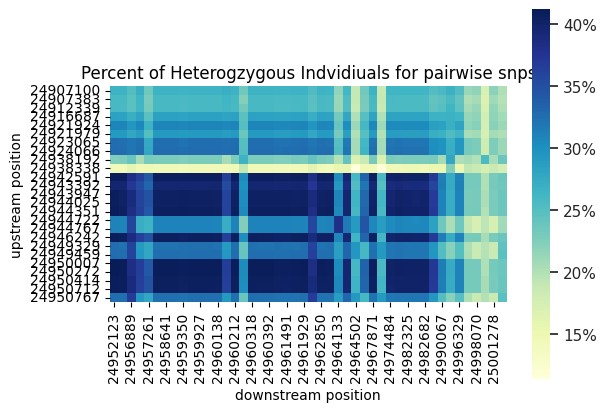

In [33]:
fig, ax = plt.subplots()
mask = np.zeros_like(within_region_het_wide_df.values) # create a masked array filled with zeroes, same shape as within_region_...df
mask[np.triu_indices_from(mask)] = True # Setting things in the upper right triangle of the mask array to 'True'
sns.set(font_scale=1, rc={"figure.figsize": (60, 20)}) #change font and figure size
fmt = lambda x,pos: '{:.0%}'.format(x) # format proportions as percentages of total # of individuals
# visualize this in heatmap form
sns.heatmap(
    within_region_het_wide_df,
    square=True,
    cmap="YlGnBu",
    annot=False,
    fmt=".0%",
    ax=ax,
    cbar_kws={'format': FuncFormatter(fmt)}
)
# axis labels
plt.xlabel('downstream position')
plt.ylabel('upstream position')
plt.title(f"Percent of Heterogzygous Indvidiuals for pairwise snps")
plt.savefig("/wynton/protected/home/capra/gramey02/ConklinCollab/figs/heterozygous_pairs_all_snps_NEFL.svg")

In [49]:
# filter the shared indviduals data frame to include only snp pairs where snp1 is before the gene start, and snp2 is after the gene end
# then we're looking at the proportion of indvidiuals column in more detail
region1_het_counts_snp_pairs_df[(region1_het_counts_snp_pairs_df.snp1<nefl_start) & (region1_het_counts_snp_pairs_df.snp2>nefl_end)].prop_shared_individuals.describe()

count    3400.000000
mean        0.144641
std         0.103680
min         0.009419
25%         0.072606
50%         0.121272
75%         0.187206
max         0.410518
Name: prop_shared_individuals, dtype: float64

## Now let's get into the "Greedy Choice" Algorithm
The reason we have to do this rather than simply picking the top few pairs of snps that hit a lot of individuals is that those top few pairs may hit a lot of individuals, but there may be a lot of overlap in those individuals, and we want to hit as many ***unique*** individuals as possible.

In [50]:
region1_het_counts_snp_pairs_df

,snp1,snp2,n_shared_individuals,n_het_snp1,n_het_snp2,n_union_individuals,prop_shared_individuals
0,24933753,24956691,489,733,1049,1293,0.191915
1,24933753,24956889,534,733,1134,1333,0.209576
2,24933753,24957233,470,733,956,1219,0.184458
3,24933753,24957261,401,733,1060,1392,0.157378
4,24933753,24957269,260,733,985,1458,0.102041
...,...,...,...,...,...,...,...
3395,24950767,25005450,377,1076,911,1610,0.147959
3396,24950767,25005503,192,1076,496,1380,0.075353
3397,24950767,25006064,331,1076,811,1556,0.129906
3398,24950767,25006085,356,1076,859,1579,0.139717


In [51]:
# again limiting to snp pairs that surround the gene
region_het_counts_snp_pairs_df = region1_het_counts_snp_pairs_df[(region1_het_counts_snp_pairs_df.snp1<nefl_start) & (region1_het_counts_snp_pairs_df.snp2>nefl_end)]
# rename for clarity. Recall that this dict contains the specific sample ids that are hit by each snp pair
region_shared_ind_dict = region1_shared_ind_dict
region_label = 'surrounding_NEFL_gene'
# sort values in the df putting highest number of individuals hit first
region_het_counts_snp_pairs_df.sort_values("n_shared_individuals", ascending=False, inplace=True)
region_het_counts_snp_pairs_df.reset_index(drop=True, inplace=True)

In [52]:
region_het_counts_snp_pairs_df

,snp1,snp2,n_shared_individuals,n_het_snp1,n_het_snp2,n_union_individuals,prop_shared_individuals
0,24950272,24956691,1046,1056,1049,1059,0.410518
1,24950007,24956691,1046,1056,1049,1059,0.410518
2,24950007,24959708,1044,1056,1056,1068,0.409733
3,24950272,24959927,1044,1056,1054,1066,0.409733
4,24950272,24959708,1044,1056,1056,1068,0.409733
...,...,...,...,...,...,...,...
3395,24941239,24973068,37,452,427,842,0.014521
3396,24935177,24999653,29,446,555,972,0.011381
3397,24935177,25005503,25,446,496,917,0.009812
3398,24935177,24973068,24,446,427,849,0.009419


## Run greedy algorithm below:

In [59]:
# Let's re-run on all of the variants
num_pairs_desired = len(region_het_counts_snp_pairs_df.snp1.values) # number of snp pairs you want to investigate #10
pair2hets = region_shared_ind_dict # dictionary: keys = snp pairs, values = sets of heterozygous individuals for the pair
selected_hets = set()
selected_pairs = []
selected_hets_steps = []

In [60]:
while (len(selected_pairs)<=num_pairs_desired):
    best_pair = None
    best_pair_num_new_hets = 0
    #print("=======================================================================================")
    #print(selected_pairs)
    
    #one greedy iteration below - for each snp pair and set of hets in the dictionary...
    for current_pair, current_hets in pair2hets.items(): # could change to snp by snp
        # with each iteration pick the current snp and all other snps in pair2hets that were previously selected
        # compare the number of new hets you get to all previously selected hets
        num_new_hets = len(set(pair2hets[current_pair] - selected_hets)) # this subtraction is not working!
        #print("\t", len(selected_hets))
        #print("\t", current_pair, num_new_hets)
        

        # if the number of new hets that this pair adds is greater than previous additions, update "best" parameters
        if (num_new_hets > best_pair_num_new_hets):
            best_pair = current_pair
            best_pair_num_new_hets = num_new_hets
            #print("\t new best pair:", best_pair)

    # update selected variables
    if best_pair is None:
        best_pair = current_pair
    selected_pairs.append(best_pair) # running tally of the best pair selections
    selected_hets_steps.append(len(selected_hets)) # get a stepped readout of how much selected_hets is increasing each time
    selected_hets = selected_hets.union(pair2hets[best_pair]) # hets that you have already selected

# stopping criteria = on number of snp pairs added or on size of selected hets (there is the risk that this would keep going, 
# and may never reach a stopping point if reaching the size of selected hets is not possible)

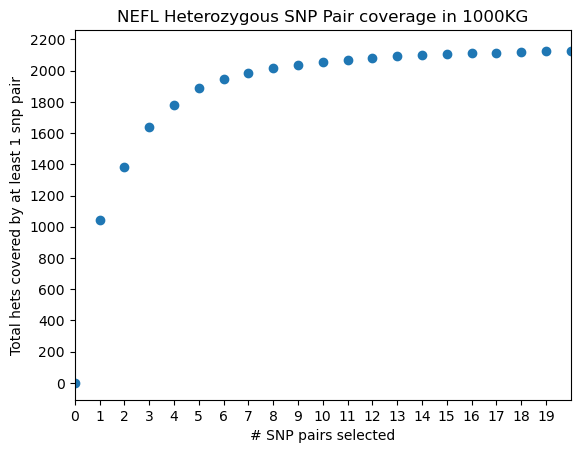

In [61]:
x = list(range(0,num_pairs_desired+1))
y = selected_hets_steps
ax = plt.axes()
plt.scatter(x,y) 
ax.set_facecolor("white")
plt.yticks(np.arange(0, max(y)+150, 200))
plt.xticks(np.arange(0, 20, 1))
plt.xlabel("# SNP pairs selected")
plt.ylabel("Total hets covered by at least 1 snp pair")
plt.title("NEFL Heterozygous SNP Pair coverage in 1000KG")
ax.set_xlim([0, 20])
plt.show()

In [62]:
# top 10 selected pairs
selected_pairs[0:10]

[(24950007, 24956691),
 (24938338, 24970047),
 (24938192, 24998400),
 (24944722, 24959631),
 (24938192, 24995536),
 (24950767, 24964269),
 (24939759, 24982556),
 (24938178, 24995536),
 (24934756, 25004300),
 (24938192, 24960290)]

In [63]:
# reformat the x axis to indicate the number of unique snps needing to be targeted (since there is some overlap in them)
unique_snps = []
unique_snps_counter = 0
unique_snps_num_step = []
for i in range(len(selected_pairs)):
    pair_counter = 0
    
    # count the number of cumulative unique snps with each pair
    cur_pair = selected_pairs[i]
    snp1 = cur_pair[0]
    snp2 = cur_pair[1]

    if (snp1 in unique_snps) == False:
        unique_snps.append(snp1)
        pair_counter+=1
    if (snp2 in unique_snps) == False:
        unique_snps.append(snp2)
        pair_counter+=1

    unique_snps_counter = unique_snps_counter + pair_counter
    unique_snps_num_step.append(unique_snps_counter)

# append a 0 to the beginning of the list because the other lists have an extra 0 as well
unique_snps_num_step.insert(0,0)

# now remove the last item of the list to make the values at the same indices
unique_snps_num_step = unique_snps_num_step[:-1]

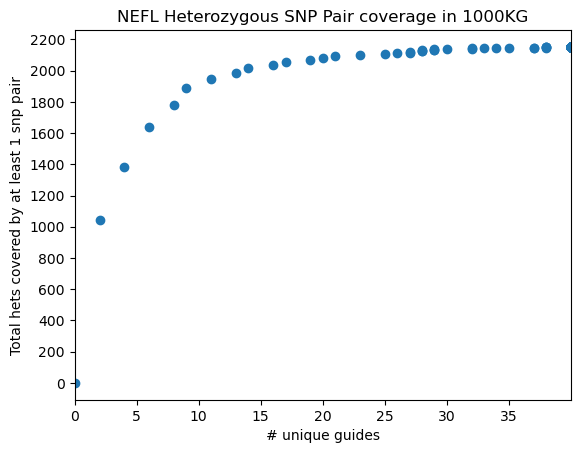

In [64]:
x = unique_snps_num_step
y = selected_hets_steps

# Now replot
ax = plt.axes()
plt.scatter(x,y) 
ax.set_facecolor("white")
plt.yticks(np.arange(0, max(y)+150, 200))
plt.xticks(np.arange(0, 40, 5))
plt.xlabel("# unique guides")
plt.ylabel("Total hets covered by at least 1 snp pair")
plt.title("NEFL Heterozygous SNP Pair coverage in 1000KG")
ax.set_xlim([0, 40])
plt.show()

In [65]:
# there is an off-by-one issue here, where the first value of "selected_hets_steps" is 0, when it should be the value for the first snp pair, so move things over by 1
selected_hets_steps.pop(0)

0

In [66]:
len(selected_hets_steps)

3400

In [67]:
# do the same but removing one redundant value from the end of the selected pairs
selected_pairs.pop()

(24950767, 25006173)

In [68]:
len(selected_pairs)

3400

In [69]:
# first convert selected_pairs to df format
df_test = pd.DataFrame(selected_pairs, columns=['snp1', 'snp2'])
df_test['num_hets_added'] = selected_hets_steps
df_test

,snp1,snp2,num_hets_added
0,24950007,24956691,1046
1,24938338,24970047,1382
2,24938192,24998400,1641
3,24944722,24959631,1777
4,24938192,24995536,1890
...,...,...,...
3395,24950767,25006173,2152
3396,24950767,25006173,2152
3397,24950767,25006173,2152
3398,24950767,25006173,2152


In [70]:
df_test['chr'] = [8]*len(selected_pairs)

In [71]:
# rename columns
df_test_formatted1 = df_test.rename(columns={'snp1': 'snp1_coordinate', 'snp2':'snp2_coordinate', 'num_hets_added':'num_hets_added_cumulative'})
df_test_formatted1

,snp1_coordinate,snp2_coordinate,num_hets_added_cumulative,chr
0,24950007,24956691,1046,8
1,24938338,24970047,1382,8
2,24938192,24998400,1641,8
3,24944722,24959631,1777,8
4,24938192,24995536,1890,8
...,...,...,...,...
3395,24950767,25006173,2152,8
3396,24950767,25006173,2152,8
3397,24950767,25006173,2152,8
3398,24950767,25006173,2152,8


In [72]:
# add a column for non-cumulative hets added, unique per snp pair
df_test_formatted1['unique_hets_added_by_SNPpair'] = [0]*len(selected_pairs)
df_test_formatted1

,snp1_coordinate,snp2_coordinate,num_hets_added_cumulative,chr,unique_hets_added_by_SNPpair
0,24950007,24956691,1046,8,0
1,24938338,24970047,1382,8,0
2,24938192,24998400,1641,8,0
3,24944722,24959631,1777,8,0
4,24938192,24995536,1890,8,0
...,...,...,...,...,...
3395,24950767,25006173,2152,8,0
3396,24950767,25006173,2152,8,0
3397,24950767,25006173,2152,8,0
3398,24950767,25006173,2152,8,0


In [73]:
# fill extra column for the number of unique hets added from one snp pair to another
for i in range(len(df_test_formatted1.chr)):
    if i==0:
        uha = df_test_formatted1.num_hets_added_cumulative[i]

    else:
        uha = df_test_formatted1.num_hets_added_cumulative[i] - df_test_formatted1.num_hets_added_cumulative[i-1]

    df_test_formatted1.unique_hets_added_by_SNPpair[i] = uha

df_test_formatted1

,snp1_coordinate,snp2_coordinate,num_hets_added_cumulative,chr,unique_hets_added_by_SNPpair
0,24950007,24956691,1046,8,1046
1,24938338,24970047,1382,8,336
2,24938192,24998400,1641,8,259
3,24944722,24959631,1777,8,136
4,24938192,24995536,1890,8,113
...,...,...,...,...,...
3395,24950767,25006173,2152,8,0
3396,24950767,25006173,2152,8,0
3397,24950767,25006173,2152,8,0
3398,24950767,25006173,2152,8,0


In [74]:
# remove non-unique pairings of snps
df_unique = df_test_formatted1.drop_duplicates(subset=['snp1_coordinate', 'snp2_coordinate'])
df_unique

,snp1_coordinate,snp2_coordinate,num_hets_added_cumulative,chr,unique_hets_added_by_SNPpair
0,24950007,24956691,1046,8,1046
1,24938338,24970047,1382,8,336
2,24938192,24998400,1641,8,259
3,24944722,24959631,1777,8,136
4,24938192,24995536,1890,8,113
5,24950767,24964269,1947,8,57
6,24939759,24982556,1987,8,40
7,24938178,24995536,2015,8,28
8,24934756,25004300,2038,8,23
9,24938192,24960290,2058,8,20


In [75]:
# reorder columns
cols=['chr', 'snp1_coordinate', 'snp2_coordinate', 'unique_hets_added_by_SNPpair', 'num_hets_added_cumulative']
df_test_formatted2 = df_unique[cols]
df_test_formatted2

,chr,snp1_coordinate,snp2_coordinate,unique_hets_added_by_SNPpair,num_hets_added_cumulative
0,8,24950007,24956691,1046,1046
1,8,24938338,24970047,336,1382
2,8,24938192,24998400,259,1641
3,8,24944722,24959631,136,1777
4,8,24938192,24995536,113,1890
5,8,24950767,24964269,57,1947
6,8,24939759,24982556,40,1987
7,8,24938178,24995536,28,2015
8,8,24934756,25004300,23,2038
9,8,24938192,24960290,20,2058


In [76]:
# add in a column for proportion of individuals
df_test_formatted2['cumulative_proportion_hets_covered'] = df_test_formatted2['num_hets_added_cumulative']/2548
df_test_formatted2

/scratch/gramey02/ipykernel_299551/1848634737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_formatted2['cumulative_proportion_hets_covered'] = df_test_formatted2['num_hets_added_cumulative']/2548


,chr,snp1_coordinate,snp2_coordinate,unique_hets_added_by_SNPpair,num_hets_added_cumulative,cumulative_proportion_hets_covered
0,8,24950007,24956691,1046,1046,0.410518
1,8,24938338,24970047,336,1382,0.542386
2,8,24938192,24998400,259,1641,0.644035
3,8,24944722,24959631,136,1777,0.697410
4,8,24938192,24995536,113,1890,0.741758
5,8,24950767,24964269,57,1947,0.764129
6,8,24939759,24982556,40,1987,0.779827
7,8,24938178,24995536,28,2015,0.790816
8,8,24934756,25004300,23,2038,0.799843
9,8,24938192,24960290,20,2058,0.807692


In [77]:
# save the dataframe
df_test_formatted2.to_csv('NEFL_het_snp_combos_10_filtered.csv')

## Now run the "single-guide" version of this
We are operating under the assumption that a single guide is held constant (e.g. BA1 from NEFL paper), and we're running through the additional SNPs that we can add on to that fixed guide to form a pair that increases the number of heterozygotes targeted.

In [74]:
# create a pool of individuals who are heterozygous for different snps in the dataset
hets_pool = set()
for current_snp, current_hets in snp2hets.items():
    hets_pool = hets_pool.union(set(snp2hets[current_snp]))

In [75]:
len(hets_pool)

1954

In [82]:
# Let's re-run on all of the variants
# full version
snp2hets = r1_snp_het_indviduals_dict # dictionary: keys = individual snps, values = sets of heterozygous individuals that the snp targets
selected_snps = []
hets_pool = set()
for current_snp, current_hets in snp2hets.items():
    hets_pool = hets_pool.union(set(snp2hets[current_snp]))
remaining_snps_set = list(snp2hets.keys())
num_snps_remaining = len(snp2hets.keys())
hets_captured = []
cur_hets_captured = None
count=0

In [83]:
# run different implementation of greedy algorithm
while(num_snps_remaining>=1 or cur_hets_captured!=0):
    print(count)
    # calculate the number of individuals that each snp hits
    snp_ind_df = pd.DataFrame({
        'snp':remaining_snps_set,
        'num_remaining_hets_targeted': [None] * num_snps_remaining
    })
    #print(snp_ind_df)
    for i in range(num_snps_remaining):
        cur_snp_total_hets_targeted = set(snp2hets[snp_ind_df['snp'][i]]) # get the total targeted hets by the current snp
        num_overlapping_hets = len(set.intersection(cur_snp_total_hets_targeted, hets_pool))# get the number of individuals that overlap between the current snp's total targeted hets, and the hets remaining in hets_pool
        snp_ind_df.loc[i, 'num_remaining_hets_targeted'] = num_overlapping_hets

    # if count==154:
    #     print(snp_ind_df)
    
    # sort the df
    sorted_df = snp_ind_df.sort_values(['num_remaining_hets_targeted'], ascending=False)
    # reset the index of the sorted df
    df_reset = sorted_df.reset_index(drop=True)

    # if count==154:
    #     print("sorted df", df_reset)

    # select the top snp from the sorted df (this is the snp that targets the most remaining individuals)
    best_snp = df_reset['snp'][0]
    selected_snps.append(best_snp)
    # if count==154:
    #     print(selected_snps)

    # update the number of heterozygous individuals captured
    hets_captured.append(df_reset['num_remaining_hets_targeted'][0])
    cur_hets_captured = df_reset['num_remaining_hets_targeted'][0]

    # remove the hets that this selected snp targets from the pool
    hets_pool = hets_pool - set(snp2hets[best_snp])

    # update remaining variables for next iteration
    remaining_snps_set.remove(best_snp)
    num_snps_remaining = num_snps_remaining-1
    count+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [84]:
selected_snps[0:10]

[24995536,
 24938192,
 24944722,
 25004300,
 25006085,
 24991070,
 24960290,
 25005194,
 24933753,
 24936529]

In [85]:
hets_captured[0:20]

[1428, 567, 234, 98, 56, 35, 24, 19, 11, 9, 7, 4, 4, 4, 2, 1, 0, 0, 0, 0]

In [86]:
cumulative_hets = []
count=0
for item in hets_captured:
    if count==0:
        cumulative_hets.append(item)
    else:
        cumulative_hets.append(cumulative_hets[-1] + item)

    count+=1
cumulative_hets[0:20]

[1428,
 1995,
 2229,
 2327,
 2383,
 2418,
 2442,
 2461,
 2472,
 2481,
 2488,
 2492,
 2496,
 2500,
 2502,
 2503,
 2503,
 2503,
 2503,
 2503]

In [87]:
# combine the results into a data frame
single_guide_df = pd.DataFrame({
    'chrom':[8]*len(selected_snps),
    'snp_position': selected_snps,
    'unique_hets_targeted_by_snp': hets_captured,
    'cumulative_hets_targeted': cumulative_hets,
    'prop_unique_hets_targeted': [x/2548 for x in hets_captured],
    'prop_cumulative_hets_targeted': [item/2548 for item in cumulative_hets]
})
single_guide_df

,chrom,snp_position,unique_hets_targeted_by_snp,cumulative_hets_targeted,prop_unique_hets_targeted,prop_cumulative_hets_targeted
0,8,24995536,1428,1428,0.560440,0.560440
1,8,24938192,567,1995,0.222527,0.782967
2,8,24944722,234,2229,0.091837,0.874804
3,8,25004300,98,2327,0.038462,0.913265
4,8,25006085,56,2383,0.021978,0.935243
...,...,...,...,...,...,...
123,8,25001687,0,2503,0.000000,0.982339
124,8,25004538,0,2503,0.000000,0.982339
125,8,25005450,0,2503,0.000000,0.982339
126,8,25005503,0,2503,0.000000,0.982339


In [88]:
# save this df
single_guide_df.to_csv('/wynton/protected/home/capra/gramey02/ConklinCollab/data/NEFL_single_guide_snps_filtered.csv')

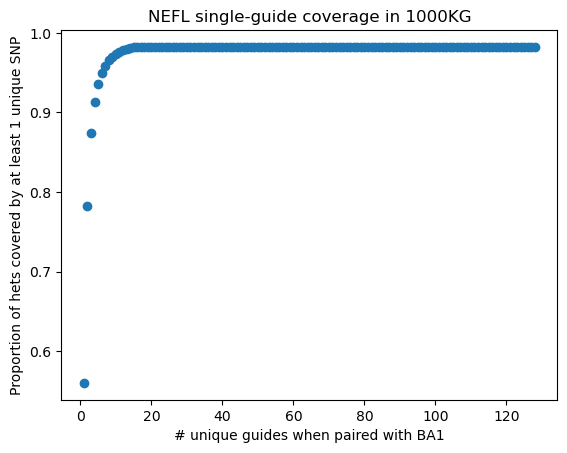

In [90]:
# can plot some of the single guide results
x = list(range(1,128+1,1))
y = single_guide_df.prop_cumulative_hets_targeted

# Now plot
ax = plt.axes()
plt.scatter(x,y)
ax.set_facecolor("white")
#plt.yticks(np.arange(0, max(y)+150, 200))
#plt.xticks(np.arange(0, 40, 5))
plt.xlabel("# unique guides when paired with BA1")
plt.ylabel("Proportion of hets covered by at least 1 unique SNP")
plt.title("NEFL single-guide coverage in 1000KG")
#ax.set_xlim([0, 40])
plt.savefig("/wynton/protected/home/capra/gramey02/ConklinCollab/figs/full_singleGuide_plot_filtered.png", bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()

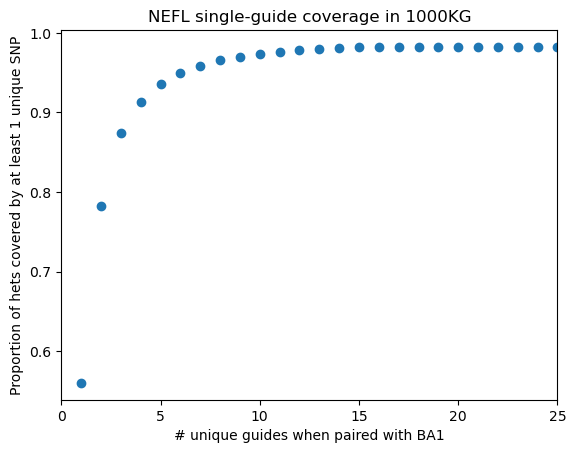

In [91]:
# get a zoomed in view of the plot
x = list(range(1,128+1,1))
y = single_guide_df.prop_cumulative_hets_targeted

# Now plot
ax = plt.axes()
plt.scatter(x,y)
ax.set_facecolor("white")
#plt.yticks(np.arange(0, max(y)+150, 200))
#plt.xticks(np.arange(0, 40, 5))
plt.xlabel("# unique guides when paired with BA1")
plt.ylabel("Proportion of hets covered by at least 1 unique SNP")
plt.title("NEFL single-guide coverage in 1000KG")
ax.set_xlim([0, 25])
plt.savefig("/wynton/protected/home/capra/gramey02/ConklinCollab/figs/zoomedIn_singleGuide_plot_filtered.png", bbox_inches="tight", pad_inches=0.3, dpi=300)
plt.show()